# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Financial market</p>

<a id="1"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Variables Explanation</p>

Here is the meaning of each column:

__Variables Table__

| Variable Name | Description  |
| ------------- | -------------- |
| Date | in format: yy-mm-dd |
| Open | The opening price of the stock |
| High | The high price of that day |
| Low | The low price of that day |
| Close | The closed price of that day |
| Volume | Number of shares traded |
| Name | the stock's ticker name |


<a id="2"></a>
# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import tensorflow as tf
from scipy import stats

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

## Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

<a id="3"></a>
# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Data Loading</p>


In [2]:
df = pd.read_csv('CAT_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,57.87,58.11,57.05,57.80,3697500,CAT
1,2006-01-04,57.95,59.43,57.55,59.27,4577200,CAT
2,2006-01-05,59.02,59.86,59.00,59.27,4590700,CAT
3,2006-01-06,59.47,60.76,59.38,60.45,5692300,CAT
4,2006-01-09,60.45,61.68,60.45,61.55,4409300,CAT


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3020 non-null   datetime64[ns]
 1   Open    3019 non-null   float64       
 2   High    3019 non-null   float64       
 3   Low     3019 non-null   float64       
 4   Close   3020 non-null   float64       
 5   Volume  3020 non-null   int64         
 6   Name    3020 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 165.3+ KB


<a id="4"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Exploratory Data Analysis (EDA)</p>

### __Checking Duplicated Data__
<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
داده ی تکراری نداریم:
</div>

In [4]:
## Checking Duplicates
print(f"Number of duplicated data: {df.duplicated().sum()}")

Number of duplicated data: 0


In [5]:
df.isnull().sum()

Date      0
Open      1
High      1
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
def describe_x(df):
    statistics = df.describe().T
    tm = df.select_dtypes(include=['float', 'int']).aggregate(func= stats.trim_mean, axis= 0, proportiontocut=0.1)
    statistics = statistics.assign(trim_mean = tm)
    statistics = statistics.assign(var = df.select_dtypes(include=['float', 'int']).var())
    statistics = statistics.assign(skewness = df.select_dtypes(include=['float', 'int']).skew())
    statistics = statistics.assign(kurtosis = df.select_dtypes(include=['float', 'int']).kurtosis())
    
    return statistics.loc[:, ['count', 'mean', 'trim_mean', 'var', 'std', 'skewness','kurtosis', 'min', '25%', '50%', '75%', 'max']]

describe_x(df)

,count,mean,trim_mean,var,std,skewness,kurtosis,min,25%,50%,75%,max
Date,3019,2011-12-31 22:43:12.381583360,NaN,NaN,NaN,NaN,NaN,2006-01-03 00:00:00,2009-01-01 00:00:00,2011-12-29 00:00:00,2014-12-30 12:00:00,2017-12-29 00:00:00
Open,3019.0,80.479881,8.092540e+01,4.377506e+02,20.922491,-0.030107,0.741969,22.65,68.445,81.82,93.66,158.05
High,3019.0,81.30423,8.173803e+01,4.375059e+02,20.916641,-0.023790,0.753779,23.29,69.22,82.58,94.46,158.65
Low,3019.0,79.56847,8.002736e+01,4.380105e+02,20.928699,-0.036075,0.742605,21.71,67.61,80.76,92.805,157.51
Close,3019.0,80.469096,8.091084e+01,4.385009e+02,20.940414,-0.025555,0.761708,22.17,68.445,81.76,93.52,158.42
Volume,3019.0,7048594.649222,6.429042e+06,1.778174e+13,4216840.596534,3.623274,31.551894,177592.0,4462425.5,6030035.0,8464836.5,67806100.0


In [8]:
df.describe(include="object")

,Name
count,3019
unique,1
top,CAT
freq,3019


In [9]:
cor_arr_delay = df.select_dtypes(include=['float', 'int']).corr()['Close']
cor_arr_delay

Open      0.998575
High      0.999334
Low       0.999362
Close     1.000000
Volume   -0.459322
Name: Close, dtype: float64

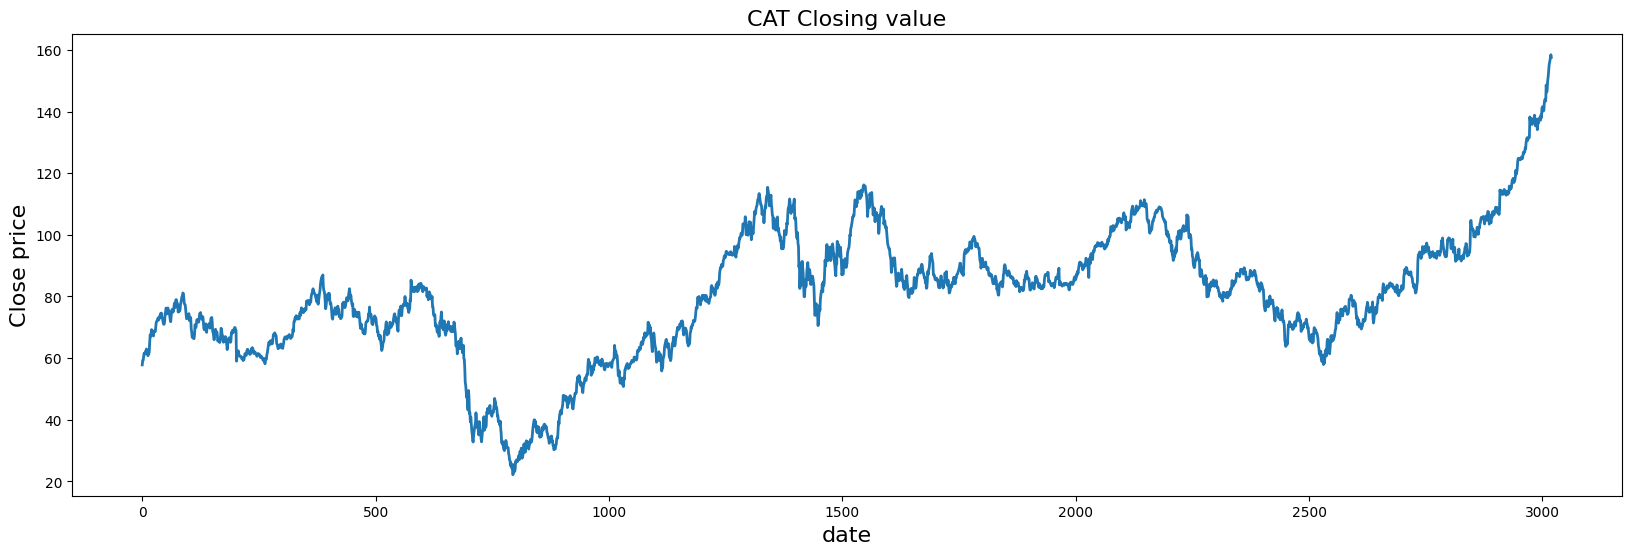

In [10]:
plt.figure(figsize=(20,6))
plt.plot(df.index, df['Close'], lw=2)
plt.xlabel("date")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price", fontsize=16)
plt.title("CAT Closing value", fontsize=16);

<a id="5"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Data Preprocessing</p>

In [11]:
def load_data(company, start, end):
    """
    Load data for the specified company and date range.

    :param company: The company's stock symbol (str)
    :param start: The starting date for the data range (str or datetime)
    :param end: The ending date for the data range (str or datetime)
    :return: A dataframe containing the relevant stock data (pandas.DataFrame)
    """
    dataframe = df.copy()
    dataframe = dataframe.loc[dataframe.Name == company, :]
    dataframe = dataframe.loc[(dataframe['Date'] > start) & (dataframe['Date'] < end), :]
    dataframe = dataframe.rename(columns = {'Closing_Price': 'Close'})
    return dataframe

In [12]:
COMPANY = 'CAT'
START_DATE = dt.datetime(2006,1,3)
END_DATE = dt.datetime(2015,12,29)

START_DATE_TEST = END_DATE

In [13]:
data = load_data(company = COMPANY,
                 start = START_DATE,
                 end = END_DATE)

In [14]:
data.head()

,Date,Open,High,Low,Close,Volume,Name
1,2006-01-04,57.95,59.43,57.55,59.27,4577200,CAT
2,2006-01-05,59.02,59.86,59.00,59.27,4590700,CAT
3,2006-01-06,59.47,60.76,59.38,60.45,5692300,CAT
4,2006-01-09,60.45,61.68,60.45,61.55,4409300,CAT
5,2006-01-10,61.35,61.52,60.64,61.30,3188100,CAT


In [15]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [16]:
# Set the number of days used for prediction
prediction_days = 60

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_days, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_days:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
xt = x_train

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

<a id="6"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Model Building</p>


In [17]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

In [18]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam', 
    loss='mean_squared_error'
)

c:\Users\almas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = 'weights_best.keras', 
    verbose = 2, 
    save_best_only = True
)

model.fit(
    x_train, 
    y_train, 
    epochs=25, 
    batch_size = 32,
    callbacks = [checkpointer]
)

Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0696
Epoch 2/25
 7/77 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0056

c:\Users\almas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0055
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0053
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0045
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0050
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0043
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0042
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0043
Epoch 9/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0039
Epoch 10/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0035
Epoch 11/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0036
Epoch 12/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0033
Epoch 13/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0037
Epoch 14/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0035
Epoch 15/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0030
Epoch 16/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0030
Epoch 17/25
77

In [20]:
# Load test data for the specified company and date range
test_data = load_data(
    company=COMPANY,
    start=START_DATE_TEST,
    end=dt.datetime.now()
)

# Extract the actual closing prices from the test data
actual_prices = test_data['Close'].values

# Concatenate the training and test data along the 'Close' column
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

# Extract the relevant portion of the dataset for model inputs
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

# Reshape the model inputs to a 2D array with a single column
model_inputs = model_inputs.reshape(-1, 1)

# Apply the same scaling used for training data to the model inputs
model_inputs = scaler.transform(model_inputs)


In [21]:
# Initialize an empty list for test data input
x_test = []

# Iterate through the model inputs, starting from the prediction_days index
for x in range(prediction_days, len(model_inputs)):
    # Append the previous 'prediction_days' values to x_test
    x_test.append(model_inputs[x-prediction_days:x, 0])

# Convert the x_test list to a numpy array
x_test = np.array(x_test)
xte = x_test

# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate price predictions using the LSTM model
predicted_prices = model.predict(x_test)

# Invert the scaling applied to the predicted prices to obtain actual values
predicted_prices = scaler.inverse_transform(predicted_prices)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


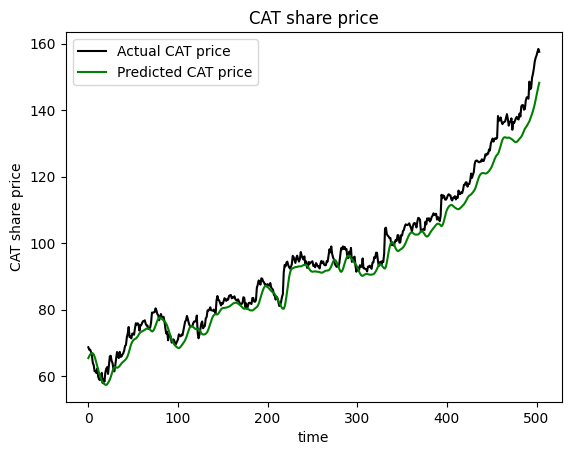

In [22]:
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual {COMPANY} price")

# Plot the predicted prices using a green line
plt.plot(predicted_prices, color='green', label=f"Predicted {COMPANY} price")

# Set the title of the plot using the company name
plt.title(f"{COMPANY} share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
plt.ylabel(f"{COMPANY} share price")

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()

In [23]:
# Extract the last 'prediction_days' values from the model inputs
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]

# Convert the real_data list to a numpy array
real_data = np.array(real_data)

# Reshape real_data to a 3D array with the appropriate dimensions for the LSTM model
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

# Generate a prediction using the LSTM model with the real_data input
prediction = model.predict(real_data)

# Invert the scaling applied to the prediction to obtain the actual value
prediction = scaler.inverse_transform(prediction)

# Print the prediction result to the console
print(f"Prediction: {prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Prediction: 149.11622619628906
